<a href="https://colab.research.google.com/github/Taiba-Naz/CNN_Classifier/blob/main/BMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet With Keras

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [46]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [47]:
def prepare_image(file):
    img_path = '/content/drive/MyDrive/training_bms/baby_sleeping'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


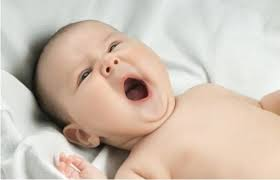

In [48]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/training_bms/baby_not_sleeping/20.jpg', width=300,height=200)

In [49]:
train_path = '/content/drive/MyDrive/training_bms'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [50]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 80 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


# Build The Fine-Tuned Model

In [51]:
#download the MobileNet model, and print a summary of it
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [52]:
#output from the sixth to last layer of the model and store it in this variable x
x = mobile.layers[-6].output
x

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d_4')>

In [53]:
output = Dense(units=2, activation='sigmoid')(x)

In [54]:
#New fine tuned model
model = Model(inputs=mobile.input, outputs=output)

In [55]:
for layer in model.layers[:-25]:
    layer.trainable = False

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

# Train The Model

In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Fit the model

In [58]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2)

Epoch 1/20
8/8 - 18s - loss: 0.8401 - accuracy: 0.5500 - val_loss: 1.0936 - val_accuracy: 0.5443
Epoch 2/20
8/8 - 7s - loss: 0.2927 - accuracy: 0.9625 - val_loss: 1.2822 - val_accuracy: 0.5823
Epoch 3/20
8/8 - 7s - loss: 0.1597 - accuracy: 1.0000 - val_loss: 1.3879 - val_accuracy: 0.5823
Epoch 4/20
8/8 - 7s - loss: 0.0911 - accuracy: 1.0000 - val_loss: 1.3745 - val_accuracy: 0.5823
Epoch 5/20
8/8 - 7s - loss: 0.0602 - accuracy: 1.0000 - val_loss: 1.3181 - val_accuracy: 0.5823
Epoch 6/20
8/8 - 7s - loss: 0.0525 - accuracy: 1.0000 - val_loss: 1.2850 - val_accuracy: 0.5823
Epoch 7/20
8/8 - 7s - loss: 0.0616 - accuracy: 1.0000 - val_loss: 1.2309 - val_accuracy: 0.5823
Epoch 8/20
8/8 - 7s - loss: 0.0597 - accuracy: 1.0000 - val_loss: 1.1611 - val_accuracy: 0.5696
Epoch 9/20
8/8 - 7s - loss: 0.0361 - accuracy: 1.0000 - val_loss: 1.0736 - val_accuracy: 0.5949
Epoch 10/20
8/8 - 7s - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.9891 - val_accuracy: 0.5949
Epoch 11/20
8/8 - 7s - loss: 0.0192 - 

In [59]:
model.save('BMS_classification.h5')

# Data Augmentation

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [61]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [62]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [63]:
chosen_image = random.choice(os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping '))

In [64]:

image_path = '/content/drive/MyDrive/training_bms/baby_sleeping /' + chosen_image

In [65]:
image = np.expand_dims(plt.imread(image_path),0)

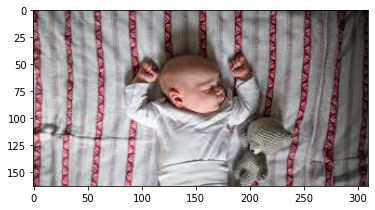

In [66]:
plt.imshow(image[0])

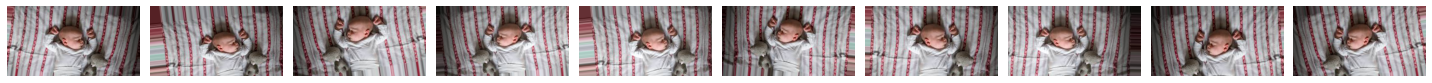

In [67]:
# we'll generate batches of augmented images from the original image.
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)


# Create batches of augmented images for all images in training directory 

In [ ]:
'''
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping ')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_sleeping /'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/training_bms/baby_sleeping_new', save_prefix='new', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely
          '''
          

In [ ]:
'''
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_not_sleeping')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_not_sleeping/'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/training_bms/baby_not_sleeping_new', save_prefix='new', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely
'''

# Training with augmented data

In [70]:
train_path = '/content/drive/MyDrive/taining_new_bms'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [71]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 1611 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [72]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2)

Epoch 1/20
162/162 - 90s - loss: 0.0882 - accuracy: 0.9745 - val_loss: 1.6437 - val_accuracy: 0.5190
Epoch 2/20
162/162 - 89s - loss: 0.0195 - accuracy: 0.9957 - val_loss: 1.0538 - val_accuracy: 0.6835
Epoch 3/20
162/162 - 90s - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.9226 - val_accuracy: 0.7089
Epoch 4/20
162/162 - 90s - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.8801 - val_accuracy: 0.6962
Epoch 5/20
162/162 - 89s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 1.3538 - val_accuracy: 0.6203
Epoch 6/20
162/162 - 90s - loss: 0.0053 - accuracy: 0.9981 - val_loss: 2.4821 - val_accuracy: 0.5316
Epoch 7/20
162/162 - 90s - loss: 0.0127 - accuracy: 0.9950 - val_loss: 2.3060 - val_accuracy: 0.5443
Epoch 8/20
162/162 - 89s - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.7757 - val_accuracy: 0.7468
Epoch 9/20
162/162 - 90s - loss: 0.0087 - accuracy: 0.9981 - val_loss: 2.6119 - val_accuracy: 0.5443
Epoch 10/20
162/162 - 90s - loss: 0.0117 - accuracy: 0.9963 - val_loss: 1.2322 - val_accura

In [ ]:
model.save('BMS_classification_augmentation.h5')

# Use The Model For Inference

In [86]:
test_labels = test_batches.classes

In [77]:
test_batches.class_indices

{'baby_not_sleeping': 0, 'baby_sleeping': 1}

In [87]:
from keras.models import load_model
model=load_model('/content/BMS_classification.h5')
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/test_bms/baby_sleeping/1.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result

array([[0.45550656, 0.78907484]], dtype=float32)

In [88]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
predictions[0:5]

array([[0.77489394, 0.6044124 ],
       [0.9799298 , 0.30263287],
       [0.9008825 , 0.0585418 ],
       [0.974928  , 0.11366165],
       [0.80520856, 0.1139521 ]], dtype=float32)

In [89]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[38  6]
 [ 3  2]]


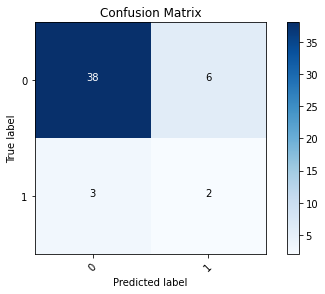

In [91]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [92]:
38/44

0.8636363636363636

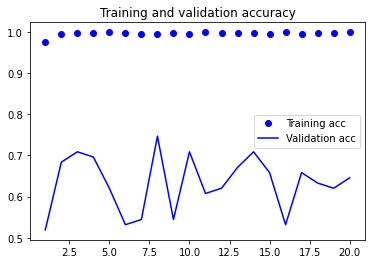

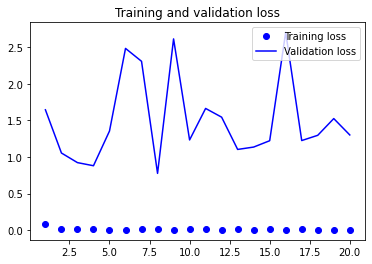

In [93]:
import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Posenet model


In [94]:
!pip install posenet

     |████████████████████████████████| 645kB 28.7MB/s 
  Created wheel for posenet: filename=posenet-0.0.3-cp37-none-any.whl size=12247 sha256=7b9d958d1cd55be8cceba257998dec17afecd75179a82f2a27d0d8b20e1da707
  Stored in directory: /root/.cache/pip/wheels/22/a4/e9/9f9946320b1be25aca39e40eddc7ae49112a7f88d8532ad52a
Successfully built posenet
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [95]:
# Necesssary imports
%tensorflow_version 1.x
!pip3 install scipy pyyaml ipykernel opencv-python==3.4.5.20


TensorFlow is already loaded. Please restart the runtime to change versions.
     |████████████████████████████████| 25.4MB 125kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
# Clone some Code from GitHub
!git clone https://www.github.com/rwightman/posenet-python
  
import os
import cv2
import time
import argparse


In [96]:
import posenet
import tensorflow as tf
import matplotlib.pyplot as plt

In [97]:
print('Iniitializing')
input_file = '/content/posenet-python/video.avi'
output_file = '/content/posenet-python/output.mp4'


Iniitializing


In [99]:
# Load input video files and images
import cv2
cap = cv2.VideoCapture(input_file)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
# create a video writer to write the output file
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

In [100]:
model = 101
###scale_factor = 1.0
scale_factor = 0.4

# pose_matching_with_PoseNet_mobilenet



In [103]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import math

In [104]:
import tensorflow as tf
model_path = "/content/drive/MyDrive/posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite"

In [105]:
# Load TFLite model and allocate tensors (memory usage method reducing latency)
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [106]:
# Get input and output tensors information from the model file
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

In [112]:
template_path = "/content/drive/MyDrive/training_bms/baby_sleeping /10.jpg"
target_path = "/content/drive/MyDrive/training_bms/baby_not_sleeping/10.jpg"

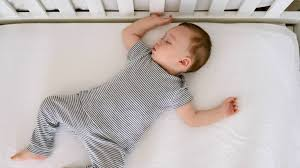

In [113]:
template_image_src = cv.imread(template_path)
src_tepml_width, src_templ_height, _ = template_image_src.shape 
template_image = cv.resize(template_image_src, (width, height))
cv2_imshow(template_image_src)

In [114]:
# can be used later to draw keypoints on the source image (before resizing)
# templ_ratio_width = src_tepml_width/width
# templ_ratio_height = src_templ_height/height

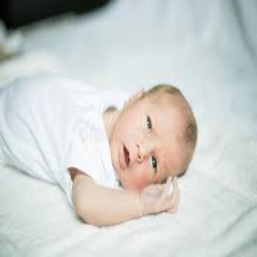

In [115]:
target_image_src = cv.imread(target_path)
# src_tar_width, src_tar_height, _ = target_image_src.shape 
target_image = cv.resize(target_image_src, (width, height))
cv2_imshow(target_image)

In [ ]:
# tar_ratio_width = src_tar_width/width
# tar_ratio_height = src_tar_height/height

In [116]:
# add a new dimension to match model's input
template_input = np.expand_dims(template_image.copy(), axis=0)
target_input = np.expand_dims(target_image.copy(), axis=0)

In [117]:
# check the type of the input tensor
floating_model = input_details[0]['dtype'] == np.float32

In [ ]:
# Floating point models offer the best accuracy, at the expense of model size 
# and performance. GPU acceleration requires the use of floating point models.

# Brings input values to range from 0 to 1

In [118]:
if floating_model:
  template_input = (np.float32(template_input) - 127.5) / 127.5
  target_input = (np.float32(target_input) - 127.5) / 127.5

In [119]:
# Process template image
# Sets the value of the input tensor
interpreter.set_tensor(input_details[0]['index'], template_input)
# Runs the computation
interpreter.invoke()
# Extract output data from the interpreter
template_output_data = interpreter.get_tensor(output_details[0]['index'])
template_offset_data = interpreter.get_tensor(output_details[1]['index'])
# Getting rid of the extra dimension
template_heatmaps = np.squeeze(template_output_data)
template_offsets = np.squeeze(template_offset_data)
print("template_heatmaps' shape:", template_heatmaps.shape)
print("template_offsets' shape:", template_offsets.shape)

template_heatmaps' shape: (9, 9, 17)
template_offsets' shape: (9, 9, 34)


In [120]:
# Process target image. Same commands
interpreter.set_tensor(input_details[0]['index'], target_input)
interpreter.invoke()
target_output_data = interpreter.get_tensor(output_details[0]['index'])
target_offset_data = interpreter.get_tensor(output_details[1]['index'])
target_heatmaps = np.squeeze(target_output_data)
target_offsets = np.squeeze(target_offset_data)

In [121]:
# The output consist of 2 parts:
# - heatmaps (9,9,17) - corresponds to the probability of appearance of 
# each keypoint in the particular part of the image (9,9)(without applying sigmoid 
# function). Is used to locate the approximate position of the joint
# - offset vectors (9,9,34) is called offset vectors. Is used for more exact
#  calculation of the keypoint's position. First 17 of the third dimension correspond
# to the x coordinates and the second 17 of them correspond to the y coordinates

In [123]:
def parse_output(heatmap_data,offset_data, threshold):

  '''
  Input:
    heatmap_data - hetmaps for an image. Three dimension array
    offset_data - offset vectors for an image. Three dimension array
    threshold - probability threshold for the keypoints. Scalar value
  Output:
    array with coordinates of the keypoints and flags for those that have
    low probability
  '''

  joint_num = heatmap_data.shape[-1]
  pose_kps = np.zeros((joint_num,3), np.uint32)

  for i in range(heatmap_data.shape[-1]):

      joint_heatmap = heatmap_data[...,i]
      max_val_pos = np.squeeze(np.argwhere(joint_heatmap==np.max(joint_heatmap)))
      remap_pos = np.array(max_val_pos/8*257,dtype=np.int32)
      pose_kps[i,0] = int(remap_pos[0] + offset_data[max_val_pos[0],max_val_pos[1],i])
      pose_kps[i,1] = int(remap_pos[1] + offset_data[max_val_pos[0],max_val_pos[1],i+joint_num])
      max_prob = np.max(joint_heatmap)

      if max_prob > threshold:
        if pose_kps[i,0] < 257 and pose_kps[i,1] < 257:
          pose_kps[i,2] = 1

  return pose_kps

In [124]:
def draw_kps(show_img,kps, ratio=None):
    for i in range(5,kps.shape[0]):
      if kps[i,2]:
        if isinstance(ratio, tuple):
          cv.circle(show_img,(int(round(kps[i,1]*ratio[1])),int(round(kps[i,0]*ratio[0]))),2,(0,255,255),round(int(1*ratio[1])))
          continue
        cv.circle(show_img,(kps[i,1],kps[i,0]),2,(0,255,255),-1)
    return show_img

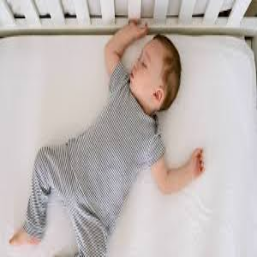

In [125]:
template_show = np.squeeze((template_input.copy()*127.5+127.5)/255.0)
template_show = np.array(template_show*255,np.uint8)
template_kps = parse_output(template_heatmaps,template_offsets,0.3)
cv2_imshow(draw_kps(template_show.copy(),template_kps))

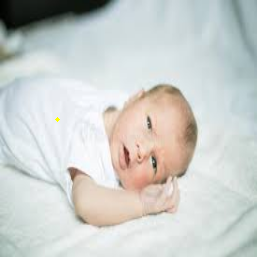

In [126]:
target_show = np.squeeze((target_input.copy()*127.5+127.5)/255.0)
target_show = np.array(target_show*255,np.uint8)
target_kps = parse_output(target_heatmaps,target_offsets,0.3)
cv2_imshow(draw_kps(target_show.copy(),target_kps))

# Matching by angles and proportions


In [ ]:
#Set template values
# Matching keypoints indices in the output of PoseNet
# 0. Left shoulder to right shoulder (5-6)
# 1. Left shoulder to left elbow (5-7)
# 2. Right shoulder to right elbow (6-8)
# 3. Left elbow to left wrist (7-9)
# 4. Right elbow to right wrist (8-10)
# 5. Left hip to right hip (11-12)
# 6. Left shoulder to left hip (5-11)
# 7. Right shoulder to right hip (6-12)
# 8. Left hip to left knee (11-13)
# 9. Right hip to right knee (12-14)
# 10. Left knee to left ankle (13-15)
# 11.  Right knee to right ankle (14-16)

In [127]:
parts_to_compare = [(5,6),(5,7),(6,8),(7,9),(8,10),(11,12),(5,11),(6,12),(11,13),(12,14),(13,15),(14,16)]


In [128]:
def angle_length(p1, p2):

  '''
  Input:
    p1 - coordinates of point 1. List
    p2 - coordinates of point 2. List
  Output:
    Tuple containing the angle value between the line formed by two input points 
    and the x-axis as the first element and the length of this line as the second
    element
  '''

  angle = math.atan2(- int(p2[0]) + int(p1[0]), int(p2[1]) - int(p1[1])) * 180.0 / np.pi
  length = math.hypot(int(p2[1]) - int(p1[1]), - int(p2[0]) + int(p1[0]))
  
  return round(angle), round(length)

In [129]:
template_values = []
for part in parts_to_compare:
  template_values.append(angle_length(template_kps[part[0]][:2], template_kps[part[1]][:2]))
template_values

[(172, 51),
 (95, 139),
 (74, 115),
 (8, 7),
 (56, 25),
 (162, 131),
 (-45, 127),
 (-73, 59),
 (144, 192),
 (115, 81),
 (-111, 96),
 (-119, 54)]

In [130]:
target_values = []
for part in parts_to_compare:
  target_values.append(angle_length(target_kps[part[0]][:2], target_kps[part[1]][:2]))
target_values

[(153, 104),
 (-148, 70),
 (-73, 97),
 (7, 43),
 (14, 67),
 (-66, 77),
 (-171, 86),
 (-74, 138),
 (-37, 121),
 (-3, 69),
 (159, 9),
 (146, 7)]

In [ ]:
# with open('template.pkl', 'wb') as f:
#   pickle.dump(template, f)

In [ ]:
# with open('template.pkl', 'rb') as f:
#   template = pickle.load(f)

#Matching

In [131]:
def matching(template_kp, target_kp, angle_deviation=30, size_deviation=1):

  '''Input:
      1. template_kp - list of tuples (for the template image) containng angles 
      between particular body parts and x-axis as first elements and its sizes 
      (distances between corresponding points as second elements)
      2. target_kp - same for the target image
      3. angle_deviation - acceptable angle difference between corresponding 
      body parts in the images
      4. size_deviation - acceptable proportions difference between the images
    Output:
      List of body parts which are deviated
  '''

  devs = []

  # set an anchor size for proportions calculations - distance between shoulders
  templ_anchor = template_kp[0][1]
  targ_anchor = target_kp[0][1]

  # for each body part that we calculated angle and size for
  for i in range(len(template_kp)):

    angles = (template_kp[i][0], target_kp[i][0])
    diff_angle = max(angles) - min(angles)

    templ_size = (template_kp[i][1],templ_anchor)
    templ_size = abs(min(templ_size) / max(templ_size))

    tar_size = (target_kp[i][1], targ_anchor)
    tar_size = abs(min(tar_size) / max(tar_size))

    if diff_angle > angle_deviation:
      devs.append(i)
      print("{0} has different angle".format(i))

    elif max(tar_size,templ_size) - min(tar_size,templ_size) > size_deviation:
      devs.append(i)
      print("{0} has different size".format(i))

  return devs

In [132]:
deviations = matching(template_values, target_values)
deviations

1 has different angle
2 has different angle
4 has different angle
5 has different angle
6 has different angle
8 has different angle
9 has different angle
10 has different angle
11 has different angle


[1, 2, 4, 5, 6, 8, 9, 10, 11]

# Draw deviations

In [133]:
def draw_deviations(img, keypoints, pairs, deviations):

  for i, pair in enumerate(pairs):

    if i in deviations:
      color = (0,0,255)
    else:
      color = (0,255,0)
      
    cv.line(img, (keypoints[pair[0]][1], keypoints[pair[0]][0]), (keypoints[pair[1]][1], keypoints[pair[1]][0]), color=color, lineType=cv.LINE_AA, thickness=1)

In [134]:
draw_deviations(target_show, target_kps, parts_to_compare, deviations)

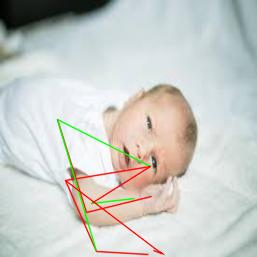

In [135]:
cv2_imshow(target_show)

In [136]:
 cv.imwrite('devs.jpg', target_show)

True

# Matching by finding the target pose in the image

## Set a target pattern

In [137]:
# Get a zero matrix with the shape of the template image
template_pose = np.zeros_like(template_show)

In [138]:
# connect some of the points 
def join_point(img, kps):

  body_parts = [(5,6),(5,7),(6,8),(7,9),(8,10),(11,12),(5,11),
                      (6,12),(11,13),(12,14),(13,15),(14,16)]

  for part in body_parts:
    cv.line(img, (kps[part[0]][1], kps[part[0]][0]), (kps[part[1]][1], kps[part[1]][0]), 
            color=(255,255,255), lineType=cv.LINE_AA, thickness=3)

In [139]:
# draw a skeleton of the template pose to the empty image
join_point(template_pose, template_kps[:, :2])

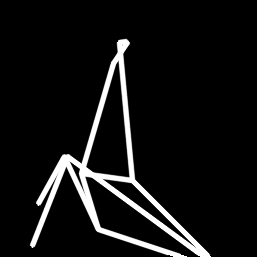

In [140]:
cv2_imshow(template_pose)

In [141]:
# set the new dimensions of the image to reduce the size
buffer = 5 # size of the area around the pose
top_left_y = min(template_kps[5:, 0]) - buffer
top_left_x = min(template_kps[5:, 1]) - buffer
buttom_right_y = max(template_kps[5:, 0]) + buffer
buttom_right_x = max(template_kps[5:, 1]) + buffer

In [142]:
# crop the template pose with new dimensions
template_pose = template_pose[top_left_y:buttom_right_y, top_left_x:buttom_right_x]

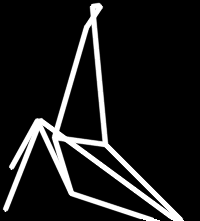

In [143]:
cv2_imshow(template_pose)

In [144]:
# save the template pattern
cv.imwrite('template_pose.jpg', template_pose)

True

# Find the pattern in the new image

In [145]:
# Get a zero matrix with the shape of the target image
target_pose = np.zeros_like(target_show)

In [146]:
# draw a skeleton of the target pose to the empty image
join_point(target_pose, target_kps[:, :2])

In [147]:
# set the new dimensions of the image to reduce the size
buffer = 5 # size of the area around the pose
top_left_y = min(target_kps[5:, 0]) - buffer
top_left_x = min(target_kps[5:, 1]) - buffer
buttom_right_y = max(target_kps[5:, 0]) + buffer
buttom_right_x = max(target_kps[5:, 1]) + buffer

In [148]:
target_pose = target_pose[top_left_y:buttom_right_y, top_left_x:buttom_right_x]

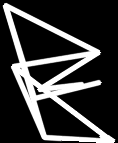

In [149]:
cv2_imshow(target_pose)

In [150]:
template_pose = cv.cvtColor(template_pose, cv.COLOR_BGR2GRAY)
target_pose = cv.cvtColor(target_pose, cv.COLOR_BGR2GRAY)

In [151]:
# the greater the threshold the more exact the pose has to match
threshold = 0.1

w, h = target_pose.shape[::-1]
res = cv.matchTemplate(target_pose,template_pose,cv.TM_CCOEFF_NORMED)
score = res.max()

print("score:", score)

if score >= threshold:
  print("Match")
else:
  print("Don't match")

score: 0.33060148
Match


# Draw grid

In [152]:
def draw_grid(img, grid_size=9, heatmap=None, part=1):

    color = (0,255,255)

    small_size = min(img.shape[0], img.shape[1])
    cell_size = small_size // grid_size
    res = int(small_size % grid_size)

    x = res // 2
    y = res // 2

    while x < img.shape[1]:
      cv.line(img, (x, 0), (x, img.shape[0]), color=color, lineType=cv.LINE_AA, thickness=1)
      x += cell_size

    while y < img.shape[0]:
      cv.line(img, (0, y), (img.shape[1], y), color=color, lineType=cv.LINE_AA, thickness=1)
      y += cell_size

    center_x = res//2
    center_y = res//2 + cell_size//2

    cv.putText(image,str(round(heatmap[0,0,part],1)), (center_x,center_y), cv.FONT_HERSHEY_SIMPLEX, 0.3, color)

    for row_idx, row in enumerate(heatmap[...,part]):

      for col_idx, column in enumerate(row):
        cv.putText(image,str(round(heatmap[col_idx,row_idx,part],1)), (center_x,center_y), cv.FONT_HERSHEY_SIMPLEX, 0.3, color)
        center_y += cell_size
        
      center_x += cell_size
      center_y = res//2 + cell_size//2

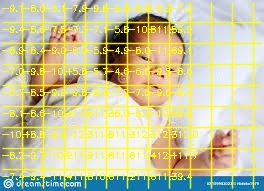

In [153]:
image = cv.imread('/content/drive/MyDrive/training_bms/baby_not_sleeping/8.jpg')
draw_grid(image, 9, template_heatmaps)
cv2_imshow(image)

# Measuring distance between objects in an image with OpenCV

In [154]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2


In [155]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [156]:
!pip install argparse

In [157]:
import argparse 
ap = argparse.ArgumentParser()
args = vars(ap.parse_args())
parser.add_argument('-f')

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-84bb9b46-0a06-481d-bb21-aba1b585a75e.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [158]:
image = cv2.imread(args["/content/drive/MyDrive/training_bms/baby_sleeping/1.jpg"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

NameError: ignored

In [161]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to the input image")
ap.add_argument("-w", "--width", type=float, required=True,
	help="width of the left-most object in the image (in inches)")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE -w WIDTH
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -w/--width


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
